#Recreate data 

##Network 

In [2]:
import json
import smash
import networkx as nx

edges = json.loads(open('edges.json').read())

g = nx.DiGraph()
for edge in edges:
    g.add_edge(edge['source'], edge['target'])
    
pos = nx.pygraphviz_layout(g, prog="neato")

myscale = {'B35': 2.0, 'B55': 1.5, 'B79': 2.2}

smash.graph(g, pos=pos, size=7, font_size=10, height=500, width=800, scale=myscale)

Couldn't import dot_parser, loading of dot files will not be possible.


Standalone graphs.

In [3]:
smash.graph(g, pos=pos, size=7, font_size=10, height=500, width=800, scale=myscale, standalone=True)

'graph.html'

Rearrange the nodes.

In [4]:
smash.drag(g, pos=pos, size=7, font_size=10, height=500, width=800, scale=myscale)

Bi-directional communication.

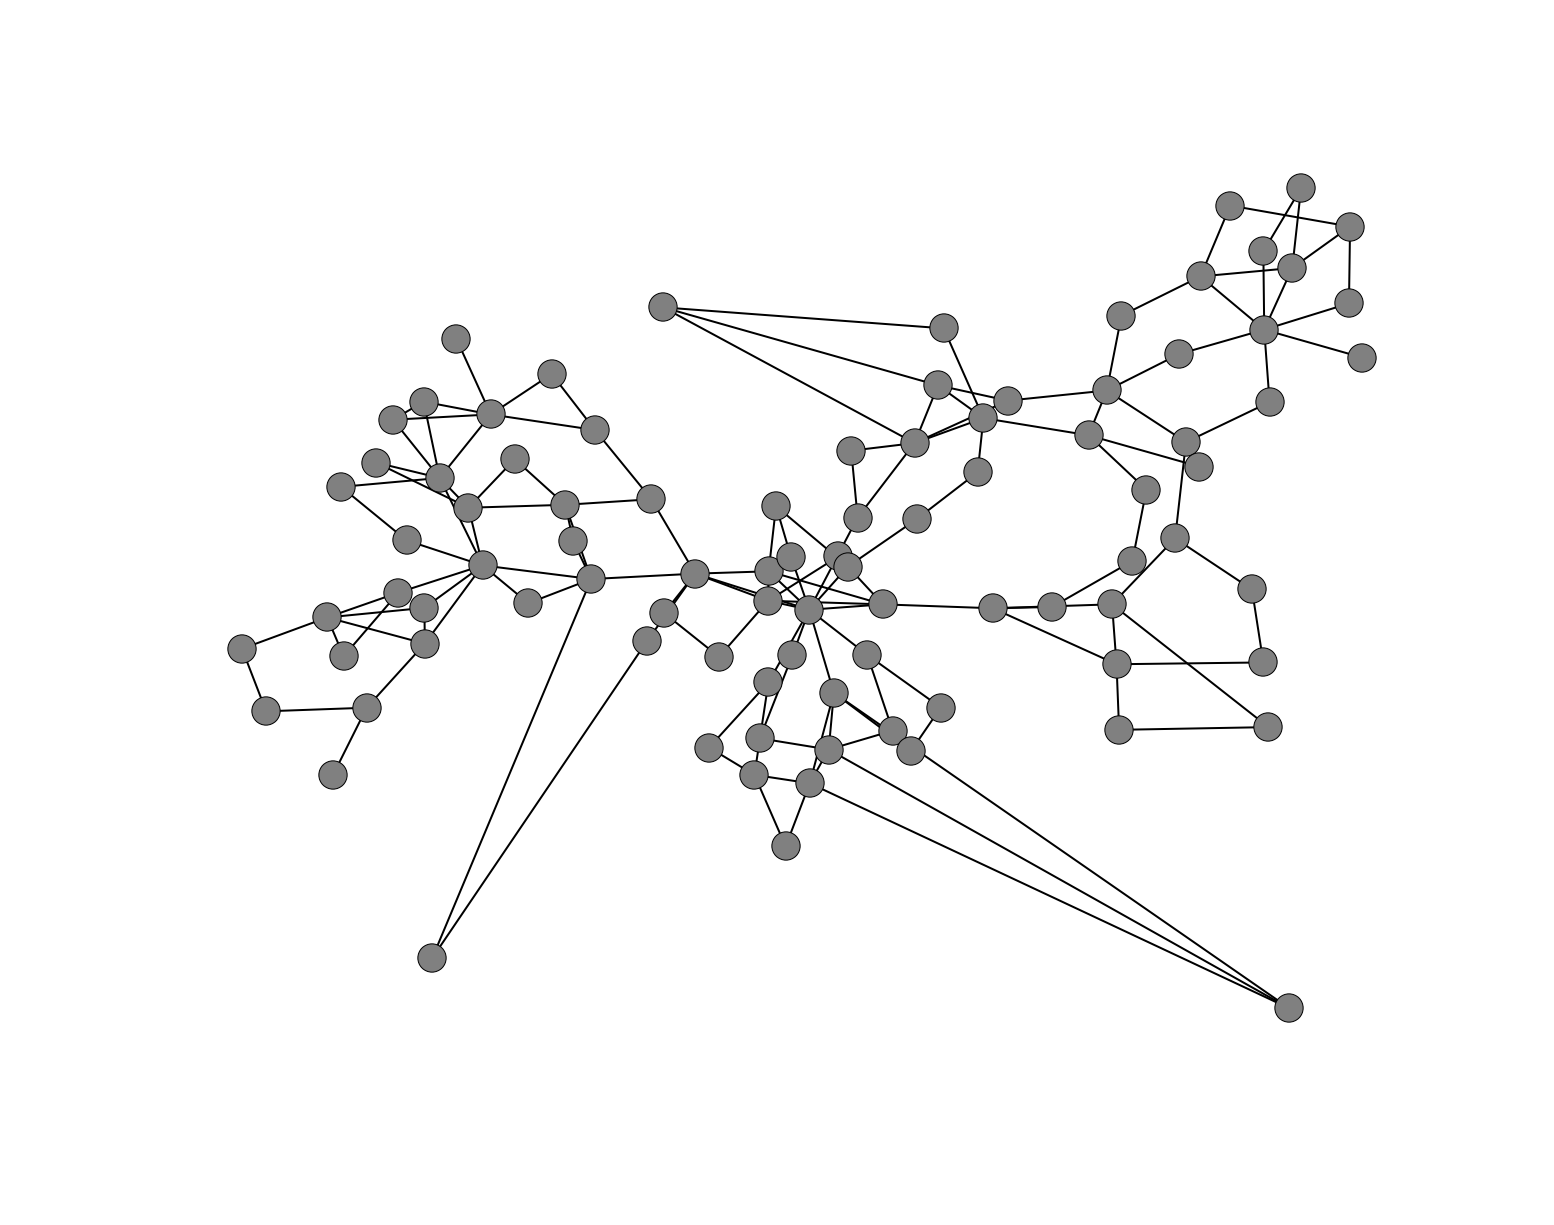

In [6]:
pos = { x['name']: (x['x'], -1*x['y']) for x in drag }
nx.draw(g.to_undirected(), pos=pos, node_size=200, node_color='grey')

##Create a small example 

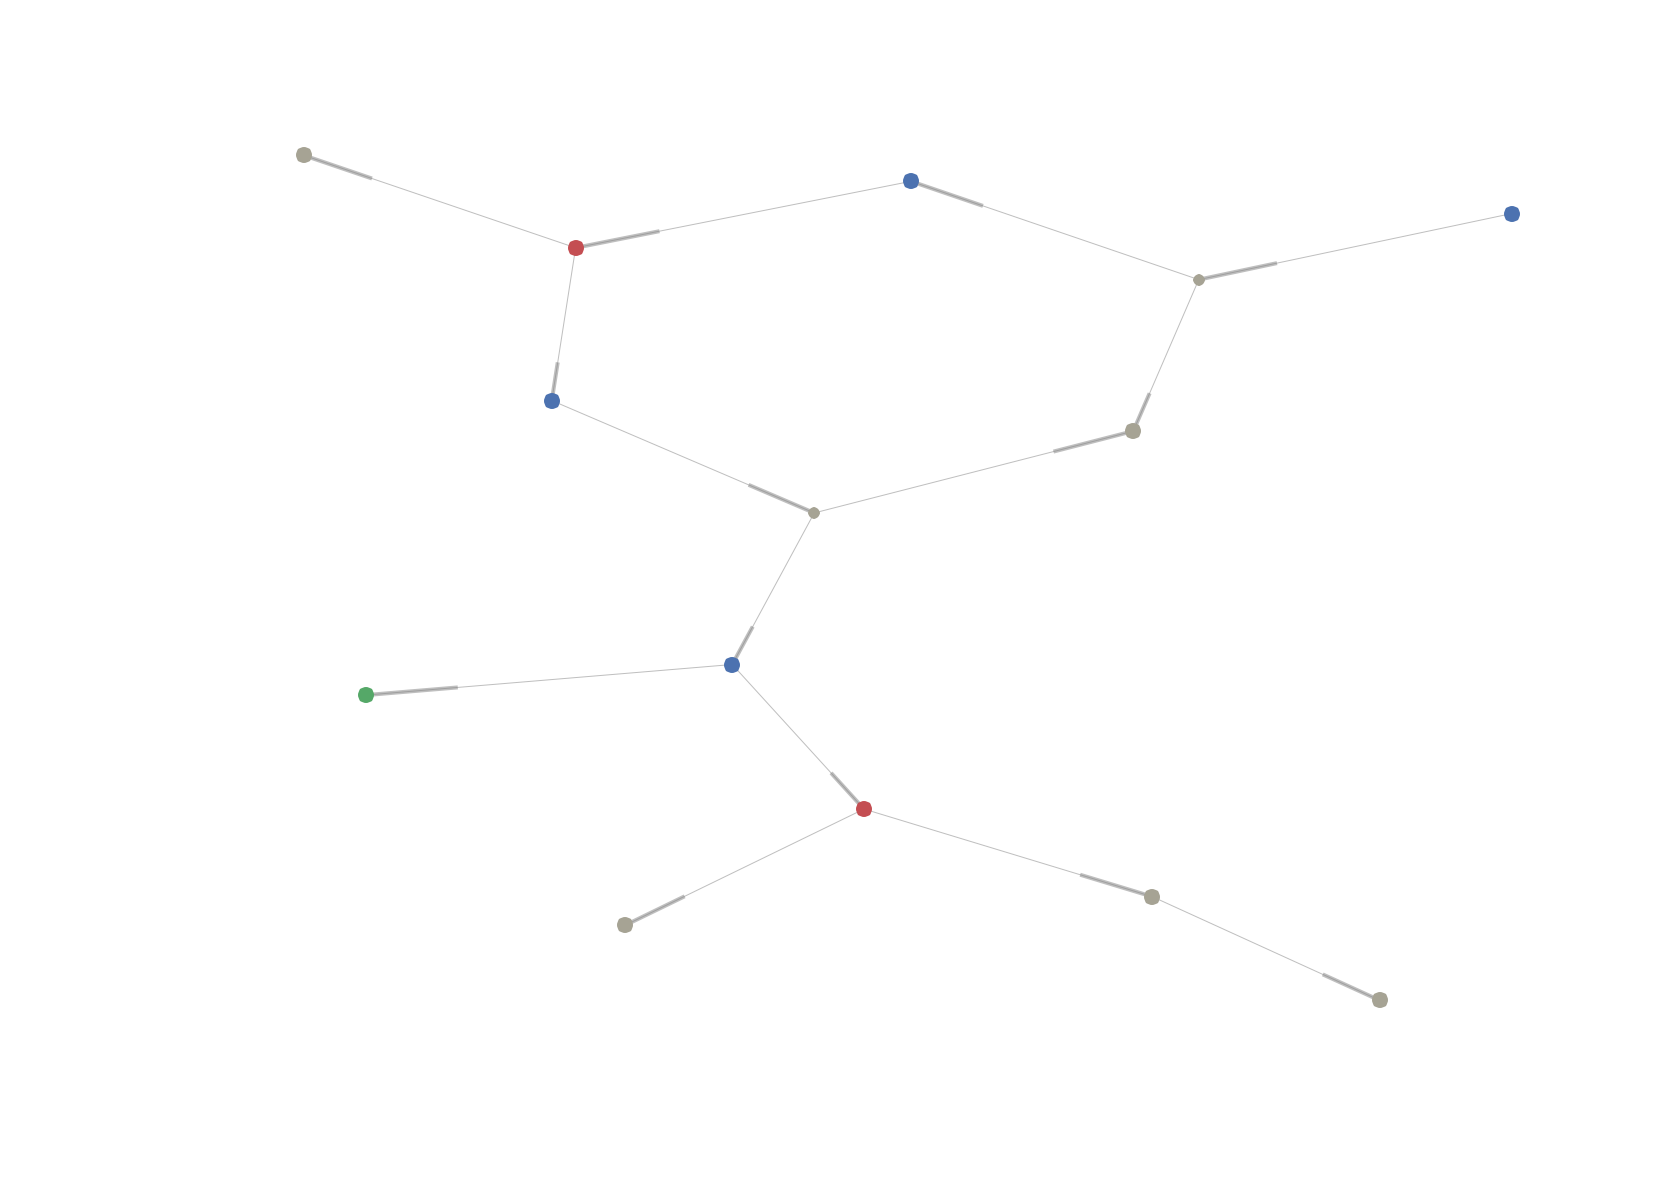

In [164]:
import tdshub as hub

g = hub.gridlabd.load(hub.cl.gridlabd.feeders.ieee_node4())
g.resetpos()
g = g.largest_connected()
g.plot()

In [165]:
g.graph.edges()
new_names = { x:"B{}".format(i) for i,x in enumerate(g.names())}
new_names

{'CTTF_A1': 'B6',
 'R5-25-00-1_tn_384': 'B10',
 'house_transformer_phaseA': 'B8',
 'line_configuration300': 'B1',
 'load4': 'B3',
 'node1': 'B4',
 'node2': 'B12',
 'node3': 'B9',
 'node4': 'B13',
 'overhead_line:1': 'B5',
 'overhead_line:34': 'B7',
 'tn_A1': 'B11',
 'transformer23': 'B0',
 'transformer_configuration400': 'B2'}

In [170]:
pos = g.pos
pos

{'CTTF_A1': (25.618, -122.28),
 'R5-25-00-1_tn_384': (141.12, -225.11),
 'house_transformer_phaseA': (-27.951, -184.84),
 'line_configuration300': (85.935, 80.9),
 'load4': (-85.874, -60.999),
 'node1': (170.72, 197.88),
 'node2': (36.16, 215.21),
 'node3': (-44.323, 97.337),
 'node4': (-3.8916, -44.57),
 'overhead_line:1': (100.61, 162.34),
 'overhead_line:34': (14.469, 36.906),
 'tn_A1': (90.19, -169.37),
 'transformer23': (-38.979, 179.46),
 'transformer_configuration400': (-99.801, 229.13)}

In [171]:
example = [{"source": new_names[x], "target": new_names[y]} for x, y in g.graph.edges()]
   
with open('../data/example_edges.json', 'w') as outfile:
    outfile.write(json.dumps(example))
    
nodes_json = [ {'name': new_names[x], 'x': y[0], 'y': y[1]}  for x,y in pos.items() if x in new_names.keys() ]

with open('../data/example_nodes.json', 'w') as outfile:
    outfile.write(json.dumps(nodes_json))


In [172]:
nodes_json

[{'name': 'B11', 'x': 90.19, 'y': -169.37},
 {'name': 'B0', 'x': -38.979, 'y': 179.46},
 {'name': 'B1', 'x': 85.935, 'y': 80.9},
 {'name': 'B2', 'x': -99.801, 'y': 229.13},
 {'name': 'B3', 'x': -85.874, 'y': -60.999},
 {'name': 'B10', 'x': 141.12, 'y': -225.11},
 {'name': 'B6', 'x': 25.618, 'y': -122.28},
 {'name': 'B7', 'x': 14.469, 'y': 36.906},
 {'name': 'B8', 'x': -27.951, 'y': -184.84},
 {'name': 'B13', 'x': -3.8916, 'y': -44.57},
 {'name': 'B4', 'x': 170.72, 'y': 197.88},
 {'name': 'B9', 'x': -44.323, 'y': 97.337},
 {'name': 'B12', 'x': 36.16, 'y': 215.21},
 {'name': 'B5', 'x': 100.61, 'y': 162.34}]

In [145]:
edges = json.loads(open('../data/example_network.json').read())

g = nx.DiGraph()
for edge in edges:
    g.add_edge(edge['source'], edge['target'])
    
smash.graph(g, font_size=10)

In [146]:
node_names = g.nodes()

## Timeseries

In [147]:
import glob
import os
import re
import pandas as pd
from operator import add

def bus_meter(x):
    return glob.glob(os.path.join(x, 'bus_meter.csv'))

files = [ bus_meter(x) for x, _, _ in os.walk('/Users/mlunacek/visualiation/data/01_voltage/notebooks/ieee118_f100_s0_ha_igms_n27-ppn16_linelim/distribution/') ]
files = reduce(add, filter(lambda x: len(x)>0, files))

In [148]:
def read_data(x):
    bus = os.path.dirname(x).split('/')[-1]
    df = pd.read_csv(x, skiprows=8)
    df.set_index('# timestamp', inplace=True)
    df.columns = [ "{}_{}".format(bus, x) for x in df.columns]
    return df, bus
    
data = [ read_data(x) for x in files ]
bus_list = [ x[1] for x in data]
dfs = [ x[0] for x in data]

df = pd.concat(dfs, axis=1)
df.index = pd.to_datetime(df.index)

In [149]:
df.head()

,B1_volt_real,B1_volt_imag,B1_price,B1_load_real,B1_load_imag,B100_volt_real,B100_volt_imag,B100_price,B100_load_real,B100_load_imag,...,B97_volt_real,B97_volt_imag,B97_price,B97_load_real,B97_load_imag,B98_volt_real,B98_volt_imag,B98_price,B98_load_real,B98_load_imag
2020-04-16 00:01:00,1.000000,0.000000,18.86875,0.672565,-2.871328,1.000000,0.000000,18.86875,15.076508,3.501780,...,1.000000,0.000000,18.86875,5.827870,1.424335,1.000000,0.000000,18.86875,11.656111,2.848796
2020-04-16 00:02:00,0.964499,0.258187,18.86875,0.682535,-2.937036,0.999754,-0.022173,18.86875,15.726206,3.654259,...,1.000703,-0.018391,18.86875,5.948482,1.442304,0.998655,-0.030704,18.86875,11.877944,2.880641
2020-04-16 00:03:00,0.964862,0.256359,18.86875,0.691870,0.175594,0.999775,-0.021216,18.86875,15.837201,3.656761,...,1.000807,-0.017785,18.86875,5.974301,1.443051,0.999294,-0.029974,18.86875,11.934727,2.883192
2020-04-16 00:04:00,0.965272,0.256690,18.86875,0.695897,0.176616,0.999782,-0.020889,18.86875,15.540938,3.524768,...,0.999635,-0.017321,18.86875,5.868232,1.403780,0.999380,-0.029700,18.86875,11.720020,2.803230
2020-04-16 00:05:00,0.965353,0.256753,18.86875,0.695956,0.176631,0.999758,-0.022014,18.86875,15.278871,3.513982,...,0.999641,-0.017842,18.86875,5.723888,1.381813,0.998702,-0.030484,18.86875,11.434426,2.761956


In [150]:
import math

tmp = df.resample('10min')

def mag(tmp, real, imag):
    vals = tmp[real]*tmp[real] + tmp[imag]*tmp[imag]
    return vals.apply(math.sqrt)


voltage = [ mag(tmp, x,y) for x,y in zip([ x for x in df.columns if re.match(r'.*volt_real', x)],
                                         [ x for x in df.columns if re.match(r'.*volt_imag', x)])]

load = [ mag(tmp, x,y) for x,y in zip([ x for x in df.columns if re.match(r'.*load_real', x)],
                                         [ x for x in df.columns if re.match(r'.*load_imag', x)])]

voltage = pd.concat(voltage, axis=1)
#voltage.columns = [ "{}_voltage".format(re.sub(r'(.*)_volt_real', r'\1', x)) for x in df.columns if re.match(r'.*volt_real', x)]

load = pd.concat(load, axis=1)
#load.columns = [ "{}_load".format(re.sub(r'(.*)_load_real', r'\1', x)) for x in df.columns if re.match(r'.*load_real', x)]

tmp = pd.concat([voltage, load], axis=1)

In [151]:
load.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
2020-04-16 00:00:00,0.857213,15.432058,7.675670,1.608065,7.682516,16.305162,13.501605,15.364406,0.514956,0.642797,...,0.342297,10.788788,21.806855,19.384777,4.447647,13.344989,13.339725,16.304572,5.931124,11.849515
2020-04-16 00:10:00,0.705776,13.769162,7.124843,1.498000,7.132514,15.376474,12.042546,14.264247,0.423848,0.573225,...,0.281797,10.408778,20.508344,17.732602,4.190531,12.567632,12.561170,15.365887,5.583658,11.173038
2020-04-16 00:20:00,0.719812,13.667885,6.956632,1.482372,6.961015,15.106703,11.960460,13.921218,0.432278,0.569560,...,0.287267,10.536966,20.086960,17.580357,4.118296,12.359418,12.356763,15.104956,5.495775,10.977542
2020-04-16 00:30:00,0.705856,13.188749,6.935490,1.455149,6.937746,14.661739,11.540246,13.870813,0.423895,0.548887,...,0.281561,10.284030,19.938975,17.128116,3.995480,11.991405,11.987034,14.651737,5.328630,10.649104
2020-04-16 00:40:00,0.709668,12.735062,6.940564,1.445978,6.942061,14.258794,11.139331,13.883214,0.426184,0.529727,...,0.283068,10.282920,19.933710,16.757002,3.891277,11.665018,11.668122,14.259410,5.186619,10.368415


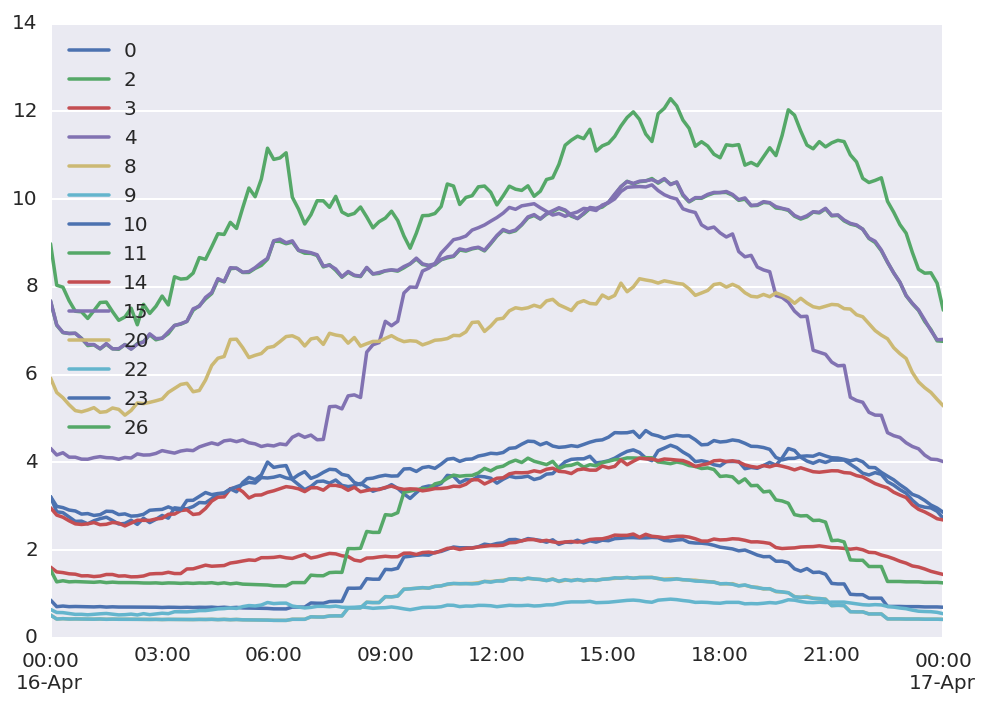

In [153]:
take = load.ix[ :, load.mean()<10]
df = take[take.columns[:len(node_names)]]
df.plot()

In [154]:
df.columns = node_names

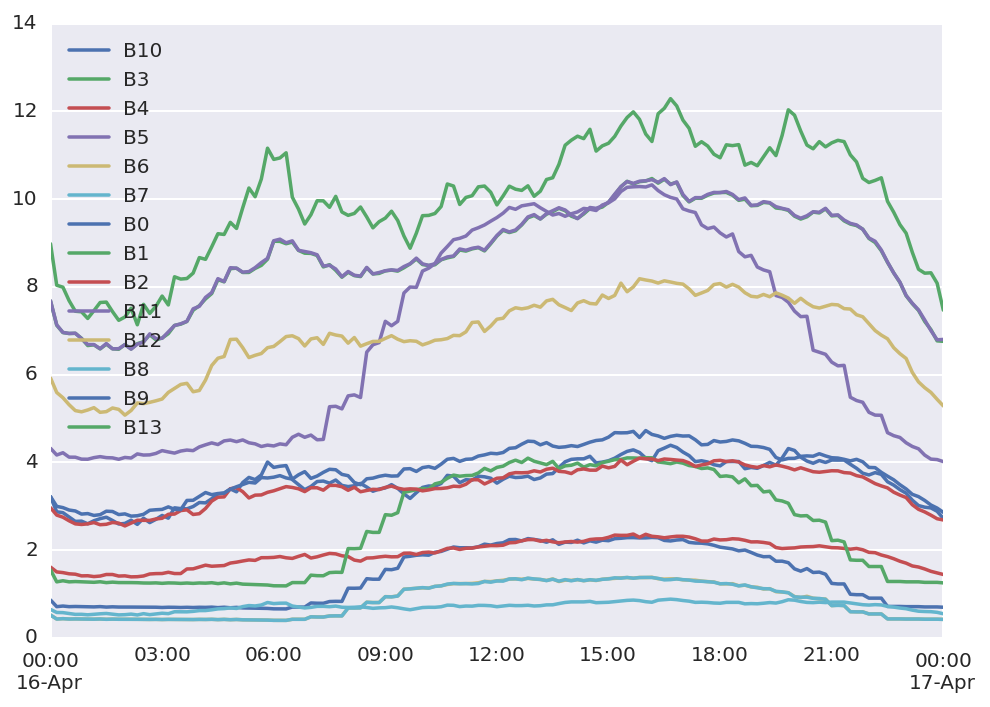

In [155]:
df.plot()

In [156]:
df.reset_index().to_csv('../data/example_load.csv', index=False)

In [157]:
!head ../data/example_load.csv

index,B10,B3,B4,B5,B6,B7,B0,B1,B2,B11,B12,B8,B9,B13
2020-04-16 00:00:00,0.857212669594,7.67566995284,1.60806522167,7.68251588423,0.514955844603,0.642797357164,3.21335934831,1.54462066449,2.96197679139,4.31725502645,5.92183807954,0.513859419479,3.21637589986,8.98228200978
2020-04-16 00:10:00,0.705776472345,7.12484267385,1.49799976561,7.13251356121,0.42384778337,0.5732246859,2.86936458419,1.27137235012,2.79434881965,4.16494102534,5.59046554751,0.423153583419,2.9934285503,8.03711889237
2020-04-16 00:20:00,0.719812464262,6.95663182784,1.48237153489,6.96101477602,0.432278078505,0.569559815191,2.84978838293,1.29667673552,2.7458485764,4.21630239973,5.4714868115,0.431596178607,2.96471774633,7.99235893561
2020-04-16 00:30:00,0.705856452329,6.93548966485,1.45514908563,6.93774616751,0.423894571372,0.548887062178,2.75149818619,1.27152171413,2.66372362342,4.11594189064,5.31146753886,0.423227671446,2.90957666109,7.68434606988
2020-04-16 00:40:00,0.709668479812,6.9405635274,1.44597786235,6.9420610669